In [1]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 7)

# Warnings
import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
# Any results you write to the current directory are saved as output.

In [2]:
data=pd.read_csv('data.csv',encoding="ISO-8859-1")
data.fillna(0, inplace=True)
data.tail()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
435737,SAMP,24-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,22.0,50.0,143.0,0.0,"Inside Rampal Industries,ULUBERIA",0.0,2015-12-24
435738,SAMP,29-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,20.0,46.0,171.0,0.0,"Inside Rampal Industries,ULUBERIA",0.0,2015-12-29
435739,0,0,andaman-and-nicobar-islands,0,0,0,0.0,0.0,0.0,0.0,0,0.0,0
435740,0,0,Lakshadweep,0,0,0,0.0,0.0,0.0,0.0,0,0.0,0
435741,0,0,Tripura,0,0,0,0.0,0.0,0.0,0.0,0,0.0,0


In [3]:
#Function to calculate so2 individual pollutant index(si)
def calculate_si(so2):
    si=0
    if (so2<=40):
     si= so2*(50/40)
    if (so2>40 and so2<=80):
     si= 50+(so2-40)*(50/40)
    if (so2>80 and so2<=380):
     si= 100+(so2-80)*(100/300)
    if (so2>380 and so2<=800):
     si= 200+(so2-380)*(100/800)
    if (so2>800 and so2<=1600):
     si= 300+(so2-800)*(100/800)
    if (so2>1600):
     si= 400+(so2-1600)*(100/800)
    return si
data['si']=data['so2'].apply(calculate_si)
df= data[['so2','si']]
df.head()

,so2,si
0,4.8,6.000
1,3.1,3.875
2,6.2,7.750
3,6.3,7.875
4,4.7,5.875


In [4]:
#Function to calculate no2 individual pollutant index(ni)
def calculate_ni(no2):
    ni=0
    if(no2<=40):
     ni= no2*50/40
    elif(no2>40 and no2<=80):
     ni= 50+(no2-14)*(50/40)
    elif(no2>80 and no2<=180):
     ni= 100+(no2-80)*(100/100)
    elif(no2>180 and no2<=280):
     ni= 200+(no2-180)*(100/100)
    elif(no2>280 and no2<=400):
     ni= 300+(no2-280)*(100/120)
    else:
     ni= 400+(no2-400)*(100/120)
    return ni
data['ni']=data['no2'].apply(calculate_ni)
df= data[['no2','ni']]
df.head()

,no2,ni
0,17.4,21.750
1,7.0,8.750
2,28.5,35.625
3,14.7,18.375
4,7.5,9.375


In [5]:
#Function to calculate no2 individual pollutant index(rpi)
def calculate_(rspm):
    rpi=0
    if(rpi<=30):
     rpi=rpi*50/30
    elif(rpi>30 and rpi<=60):
     rpi=50+(rpi-30)*50/30
    elif(rpi>60 and rpi<=90):
     rpi=100+(rpi-60)*100/30
    elif(rpi>90 and rpi<=120):
     rpi=200+(rpi-90)*100/30
    elif(rpi>120 and rpi<=250):
     rpi=300+(rpi-120)*(100/130)
    else:
     rpi=400+(rpi-250)*(100/130)
    return rpi
data['rpi']=data['rspm'].apply(calculate_si)
df= data[['rspm','rpi']]
df.tail()
#many data values of rspm values is unawailable since it was not measure before

,rspm,rpi
435737,143.0,121.000000
435738,171.0,130.333333
435739,0.0,0.000000
435740,0.0,0.000000
435741,0.0,0.000000


In [6]:
#Function to calculate no2 individual pollutant index(spi)
def calculate_spi(spm):
    spi=0
    if(spm<=50):
     spi=spm
    if(spm<50 and spm<=100):
     spi=spm
    elif(spm>100 and spm<=250):
     spi= 100+(spm-100)*(100/150)
    elif(spm>250 and spm<=350):
     spi=200+(spm-250)
    elif(spm>350 and spm<=450):
     spi=300+(spm-350)*(100/80)
    else:
     spi=400+(spm-430)*(100/80)
    return spi
data['spi']=data['spm'].apply(calculate_spi)
df= data[['spm','spi']]
df.tail()
#many data values of rspm values is unawailable since it was not measure before

,spm,spi
435737,0.0,0.0
435738,0.0,0.0
435739,0.0,0.0
435740,0.0,0.0
435741,0.0,0.0


In [7]:
#function to calculate the air quality index (AQI) of every data value
#its is calculated as per indian govt standards
def calculate_aqi(si,ni,spi,rpi):
    aqi=0
    if(si>ni and si>spi and si>rpi):
     aqi=si
    if(spi>si and spi>ni and spi>rpi):
     aqi=spi
    if(ni>si and ni>spi and ni>rpi):
     aqi=ni
    if(rpi>si and rpi>ni and rpi>spi):
     aqi=rpi
    return aqi
data['AQI']=data.apply(lambda x:calculate_aqi(x['si'],x['ni'],x['spi'],x['rpi']),axis=1)
df= data[['sampling_date','state','si','ni','rpi','spi','AQI']]
df.head()

,sampling_date,state,si,ni,rpi,spi,AQI
0,February - M021990,Andhra Pradesh,6.000,21.750,0.0,0.0,21.750
1,February - M021990,Andhra Pradesh,3.875,8.750,0.0,0.0,8.750
2,February - M021990,Andhra Pradesh,7.750,35.625,0.0,0.0,35.625
3,March - M031990,Andhra Pradesh,7.875,18.375,0.0,0.0,18.375
4,March - M031990,Andhra Pradesh,5.875,9.375,0.0,0.0,9.375


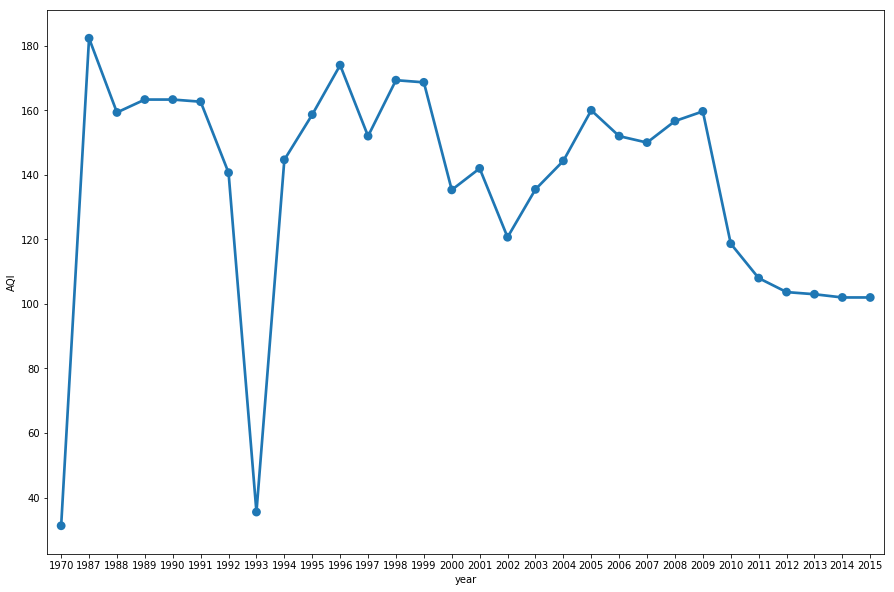

In [8]:
#Visualization of AQI across india 

data['date'] = pd.to_datetime(data['date'],format='%Y-%m-%d') # date parse
data['year'] = data['date'].dt.year # year
data['year'] = data['year'].fillna(0.0).astype(int)
data = data[(data['year']>0)]

df = data[['AQI','year','state']].groupby(["year"]).median().reset_index().sort_values(by='year',ascending=False)
f,ax=plt.subplots(figsize=(15,10))
sns.pointplot(x='year', y='AQI', data=df)

In [9]:
#setting up date parameter
import warnings
import itertools
import dateutil
import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
%matplotlib inline
df=data[['AQI','date']]
df["date"] = pd.to_datetime(df['date'])
df.tail(20)

,AQI,date
435722,118.333333,2015-11-05
435723,118.666667,2015-11-07
435724,140.666667,2015-11-10
435725,133.666667,2015-11-11
435726,105.000000,2015-11-16
435727,112.666667,2015-11-20
435728,121.333333,2015-11-26
435729,120.000000,2015-11-29
435730,120.666667,2015-12-03
435731,125.000000,2015-12-06


In [10]:
#Calculating the yearly mean for the data 
df=df.set_index('date').resample('M')["AQI"].mean()
df.head()

date
1970-01-31    49.654762
1970-02-28          NaN
1970-03-31          NaN
1970-04-30          NaN
1970-05-31          NaN
Freq: M, Name: AQI, dtype: float64

In [11]:
#preprocessing the data values
data=df.reset_index(level=0, inplace=False)
data = data[np.isfinite(data['AQI'])]
data=data[data.date != '1970-01-31']
data = data.reset_index(drop=True)
data.head()

,date,AQI
0,1987-01-31,242.438652
1,1987-02-28,235.787929
2,1987-03-31,294.558772
3,1987-04-30,202.012681
4,1987-05-31,307.991667


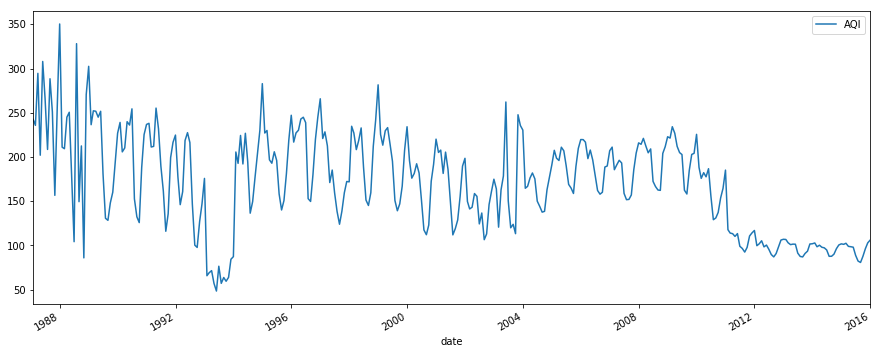

In [12]:
#visualizing the processed data of AQI

df=data.set_index('date')
df.sort_values(by='date',ascending=False)
df.plot(figsize=(15, 6))
plt.show()
y=df.AQI


In [13]:
#exctracting knowledge about data

#spliting dataframes into test and train
n = df.shape[0]
train_size = 0.65

features_dataframe = df.sort_values('date')
train = df.iloc[:int(n * train_size)]
test = df.iloc[int(n * train_size):]

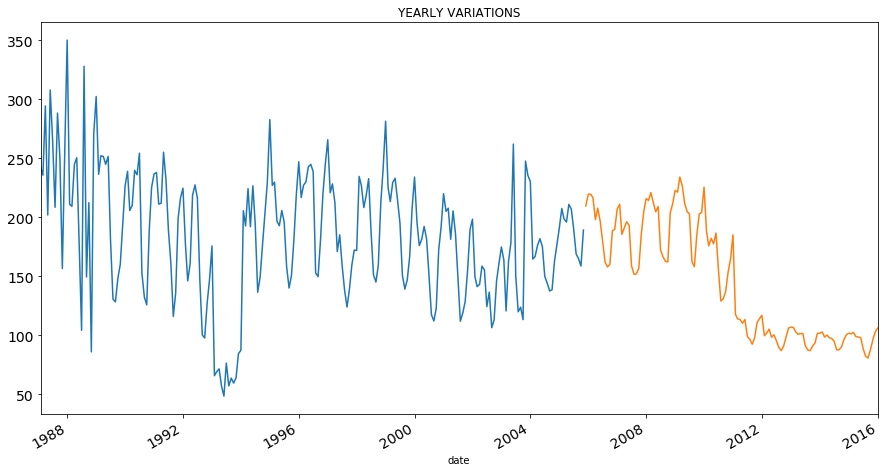

In [14]:
#plotting the yearly variations of AQI

train.AQI.plot(figsize=(15,8), title= 'YEARLY VARIATIONS', fontsize=14)
test.AQI.plot(figsize=(15,8), title= 'YEARLY VARIATIONS', fontsize=14)
plt.show()

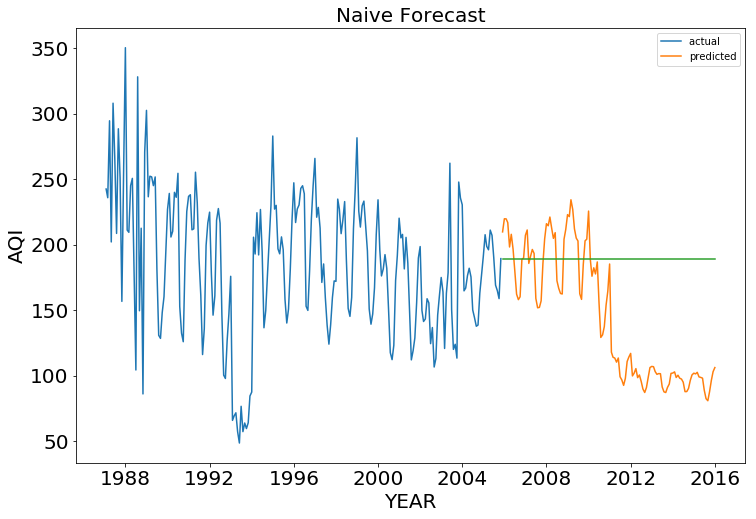

In [15]:
#Naive Forecast Approach to find the variations(trend)

dd= np.asarray(train.AQI)
y_hat = test.copy()
y_hat['naive'] = dd[len(dd)-1]
plt.figure(figsize=(12,8))
plt.plot(train.index, train['AQI'], label='Train')
plt.plot(test.index,test['AQI'], label='Test')
plt.plot(y_hat.index,y_hat['naive'], label='Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Forecast",fontsize=20)

plt.legend(["actual ","predicted"])
plt.xlabel("YEAR",fontsize=20)
plt.ylabel("AQI",fontsize=20)
plt.tick_params(labelsize=20)
plt.show()


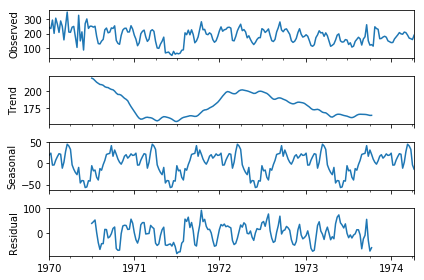

In [16]:
#various statmodel to identity huge variations od data values
import statsmodels.api as sm
train.index=pd.DatetimeIndex(freq="w", start=0 ,periods=224)

sm.tsa.seasonal_decompose(train.AQI).plot()
result = sm.tsa.stattools.adfuller(train.AQI)
plt.show()

In [17]:
#resampling the data to predict monthly AQI of india

df=data[['AQI','date']]

df['date']=pd.to_datetime(df['date'])
date=df.groupby(pd.Grouper(key='date',freq='1MS'))["AQI"].mean()
df.count()


AQI     346
date    346
dtype: int64

In [18]:
#splitting the sampling date into month and year accordingly
data['month'] = data['date'].dt.month
data['year'] = data['date'].dt.year
data=data[['AQI','date','month','year']]
data.head()

,AQI,date,month,year
0,242.438652,1987-01-31,1,1987
1,235.787929,1987-02-28,2,1987
2,294.558772,1987-03-31,3,1987
3,202.012681,1987-04-30,4,1987
4,307.991667,1987-05-31,5,1987


In [19]:
#predicting JANUARY-AQI across india
data=data[data['month']==1]
data.head()

,AQI,date,month,year
0,242.438652,1987-01-31,1,1987
12,211.076502,1988-01-31,1,1988
24,236.513310,1989-01-31,1,1989
35,239.071032,1990-01-31,1,1990
47,238.060052,1991-01-31,1,1991


In [20]:
#Appling BOXPLOT analysis
df = data[['AQI','year']].groupby(["year"]).mean().reset_index().sort_values(by='year',ascending=False)
df=df.dropna()
dd=df
df.describe()

,year,AQI
count,29.000000,29.000000
mean,2001.000000,186.582077
std,8.514693,51.439662
min,1987.000000,65.754613
25%,1994.000000,163.875510
50%,2001.000000,207.546049
75%,2008.000000,221.368166
max,2015.000000,242.438652


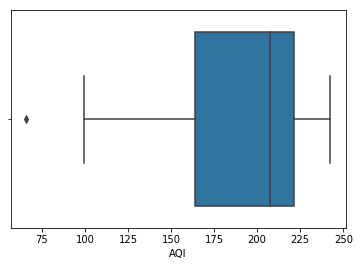

In [21]:
import seaborn as sns
sns.boxplot(x=df['AQI'])

In [22]:
#removing Outliers
df = df[np.isfinite(df['AQI'])]
df=df[df.AQI >153]
df=df[df.AQI <221]


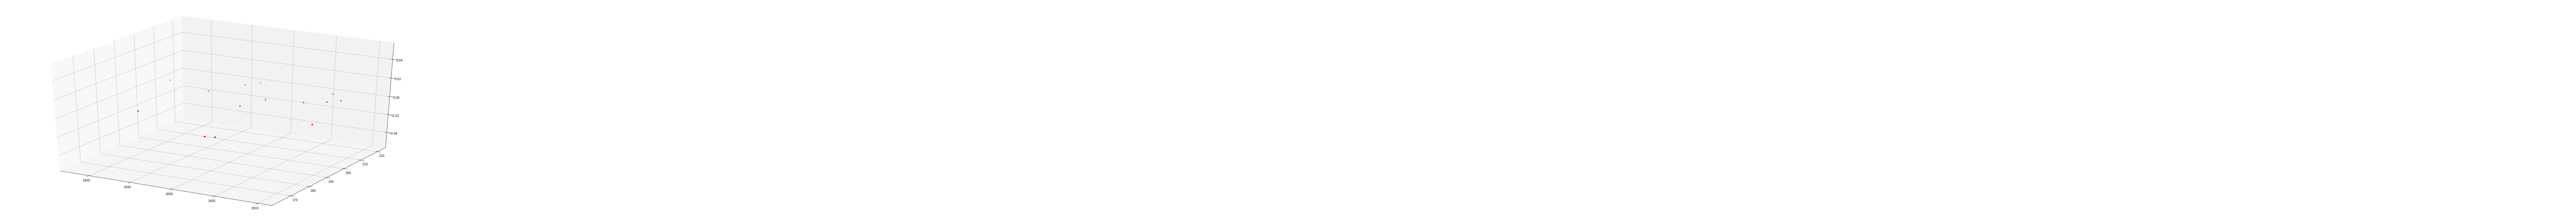

In [23]:
#visualizing the filttered data

year=df['year'].values
AQI=df['AQI'].values
df['AQI']=pd.to_numeric(df['AQI'],errors='coerce')
df['year']=pd.to_numeric(df['year'],errors='coerce')

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 10.0)
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(year,AQI, color='red')
plt.show()

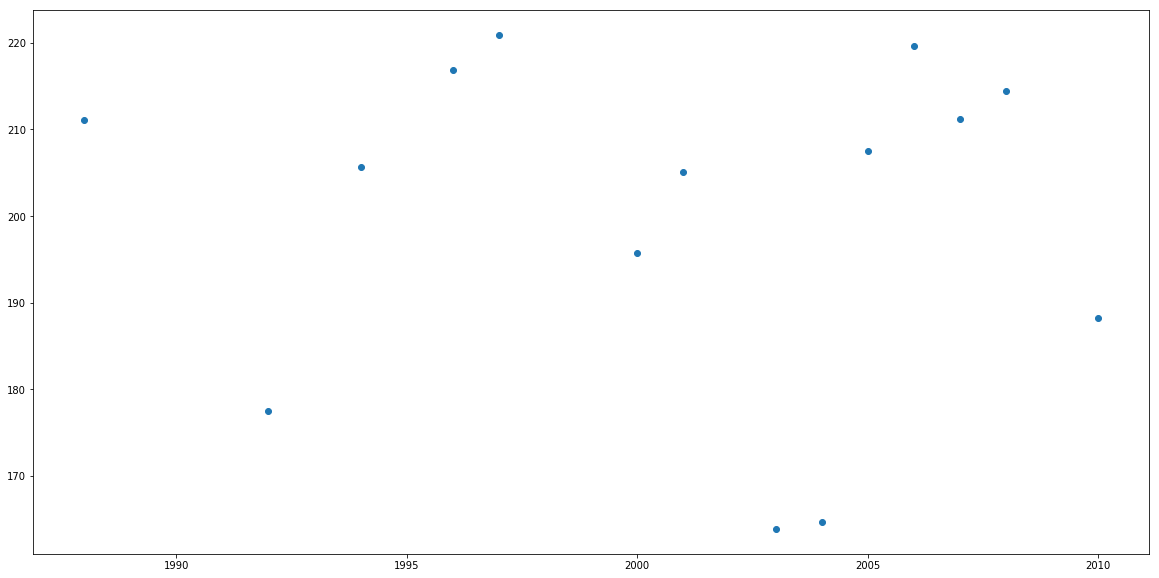

In [24]:
#scatter plot of data points
cols =['year']
y = df['AQI']
x=df[cols]

plt.scatter(x,y)
plt.show()

In [25]:

x = (x - x.mean()) / x.std()
x = np.c_[np.ones(x.shape[0]), x]
x

array([[ 1.        ,  1.40346276],
       [ 1.        ,  1.09883519],
       [ 1.        ,  0.9465214 ],
       [ 1.        ,  0.79420761],
       [ 1.        ,  0.64189382],
       [ 1.        ,  0.48958003],
       [ 1.        ,  0.33726625],
       [ 1.        ,  0.03263867],
       [ 1.        , -0.11967512],
       [ 1.        , -0.57661648],
       [ 1.        , -0.72893027],
       [ 1.        , -1.03355785],
       [ 1.        , -1.33818543],
       [ 1.        , -1.94744058]])

In [26]:
# Applying GRADIENT DESCENT 

alpha = 0.1 #Step size
iterations = 3000 #No. of iterations
m = y.size #No. of data points
np.random.seed(4) #Setting the seed
theta = np.random.rand(2) #Picking random values to start with

def gradient_descent(x, y, theta, iterations, alpha):
    past_costs = []
    past_thetas = [theta]
    for i in range(iterations):
        prediction = np.dot(x, theta)
        error = prediction - y
        cost = 1/(2*m) * np.dot(error.T, error)
        past_costs.append(cost)
        theta = theta - (alpha * (1/m) * np.dot(x.T, error))
        past_thetas.append(theta)
        
    return past_thetas, past_costs
past_thetas, past_costs = gradient_descent(x, y, theta, iterations, alpha)
theta = past_thetas[-1]

#Printing the results...
print("Gradient Descent: {:.2f}, {:.2f}".format(theta[0], theta[1]))

Gradient Descent: 200.17, -1.54


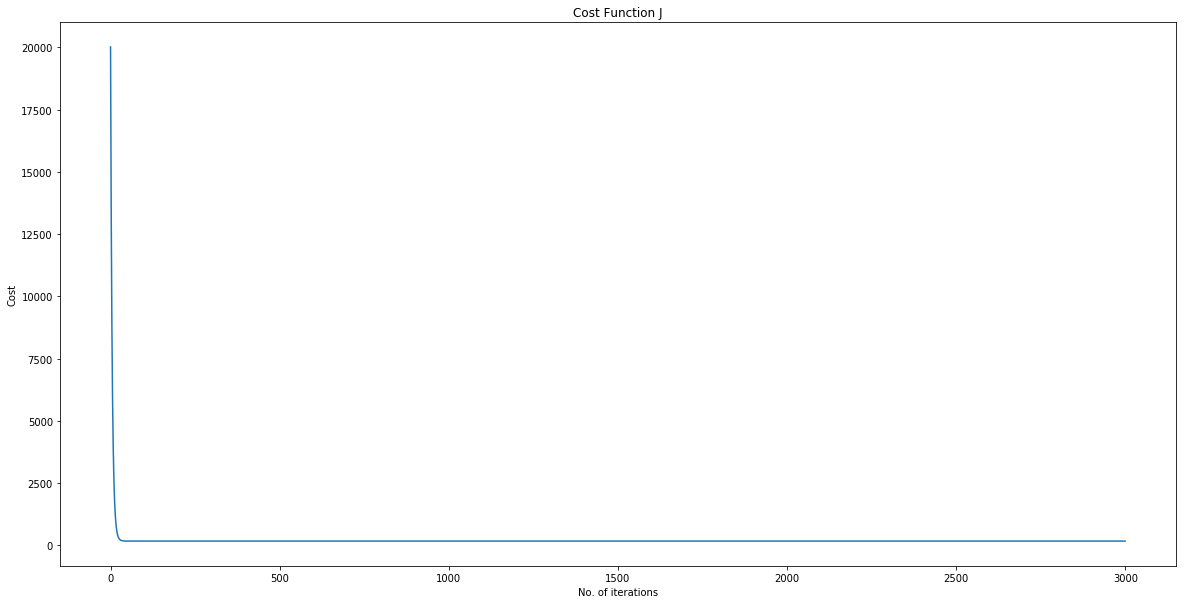

In [27]:
#Plotting the cost function...
plt.title('Cost Function J')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.plot(past_costs)
plt.show()

In [28]:
#Predicted val
newB=[ 200.17, -1.54]
def rmse(y,y_pred):
    rmse=np.sqrt(sum(y-y_pred))
    return rmse

   
y_pred=x.dot(newB)

dt = pd.DataFrame({'Actual': y, 'Predicted': y_pred})  
x=pd.concat([df, dt], axis=1)
x
x

,year,AQI,Actual,Predicted
23,2010,188.283360,188.283360,198.008667
21,2008,214.378174,214.378174,198.477794
20,2007,211.160807,211.160807,198.712357
19,2006,219.623267,219.623267,198.946920
18,2005,207.546049,207.546049,199.181484
17,2004,164.661496,164.661496,199.416047
16,2003,163.875510,163.875510,199.650610
14,2001,205.138247,205.138247,200.119736
13,2000,195.772377,195.772377,200.354300
10,1997,220.903571,220.903571,201.057989


In [29]:
#calculating the root mean squared error for the predicted AQi values
from sklearn import metrics
print(np.sqrt(metrics.mean_squared_error(y,y_pred)))

18.630885273104628


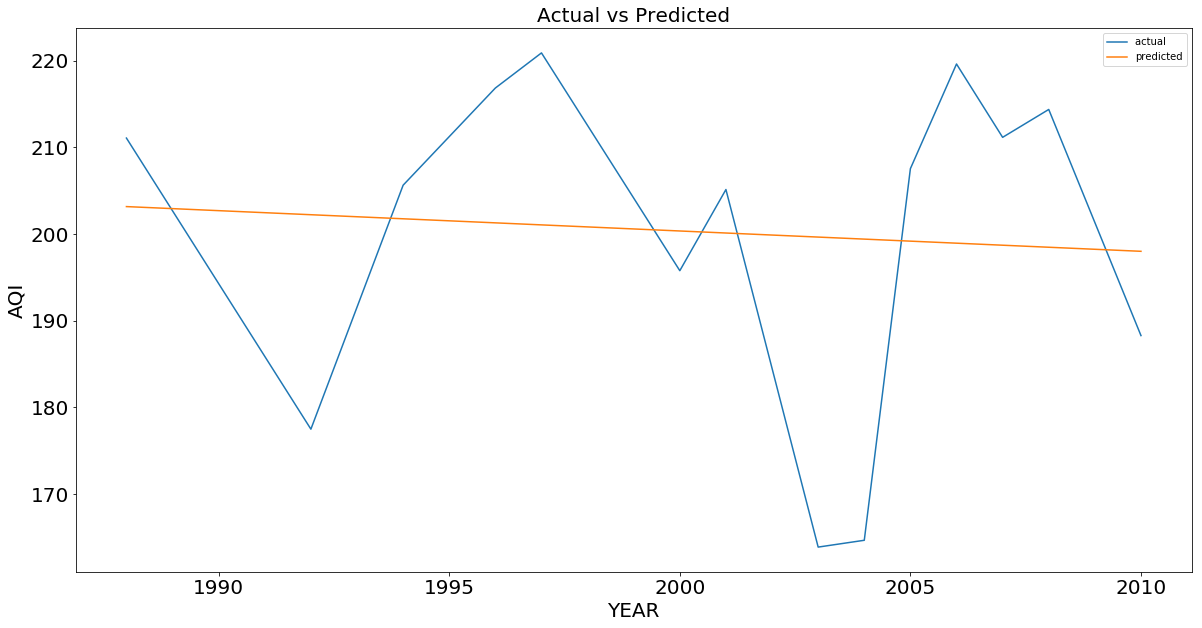

In [30]:
x_axis=x.year
y_axis=x.Actual
y1_axis=x.Predicted
plt.plot(x_axis,y_axis)
plt.plot(x_axis,y1_axis)
plt.title("Actual vs Predicted",fontsize=20)
plt.legend(["actual ","predicted"])
plt.xlabel("YEAR",fontsize=20)
plt.ylabel("AQI",fontsize=20)
plt.tick_params(labelsize=20)
plt.show()

In [31]:
#improving the accuracy by splitting the data on heavy variations

df=dd[['year','AQI']]


#huge variations aqi accures on year 2009-2010 (by moving average graph)
df=df[df.year<2011]
df.describe()

,year,AQI
count,24.000000,24.000000
mean,1998.500000,203.441075
std,7.071068,38.624462
min,1987.000000,65.754613
25%,1992.750000,193.900123
50%,1998.500000,212.769491
75%,2004.250000,225.854972
max,2010.000000,242.438652


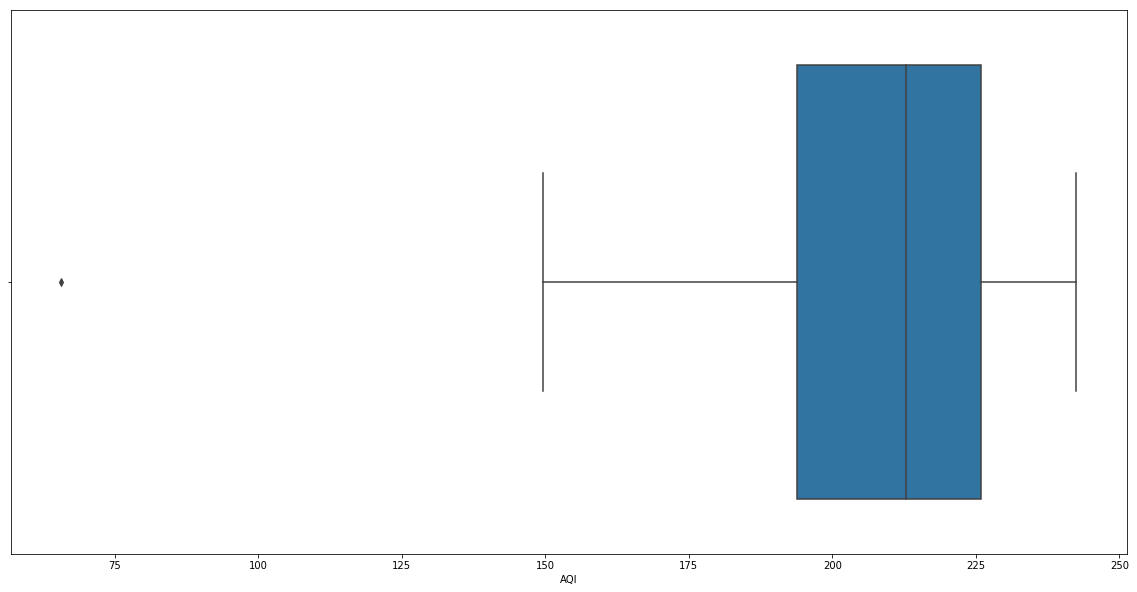

In [32]:
#applying boxplot analysis
import seaborn as sns
sns.boxplot(x=df['AQI'])

In [33]:
#removing outliers
df = df[np.isfinite(df['AQI'])]
df=df[df.AQI >200]
df=df[df.AQI <226]
df

,year,AQI
22,2009,221.368166
21,2008,214.378174
20,2007,211.160807
19,2006,219.623267
18,2005,207.546049
14,2001,205.138247
12,1999,225.439218
10,1997,220.903571
9,1996,216.850189
7,1994,205.636343


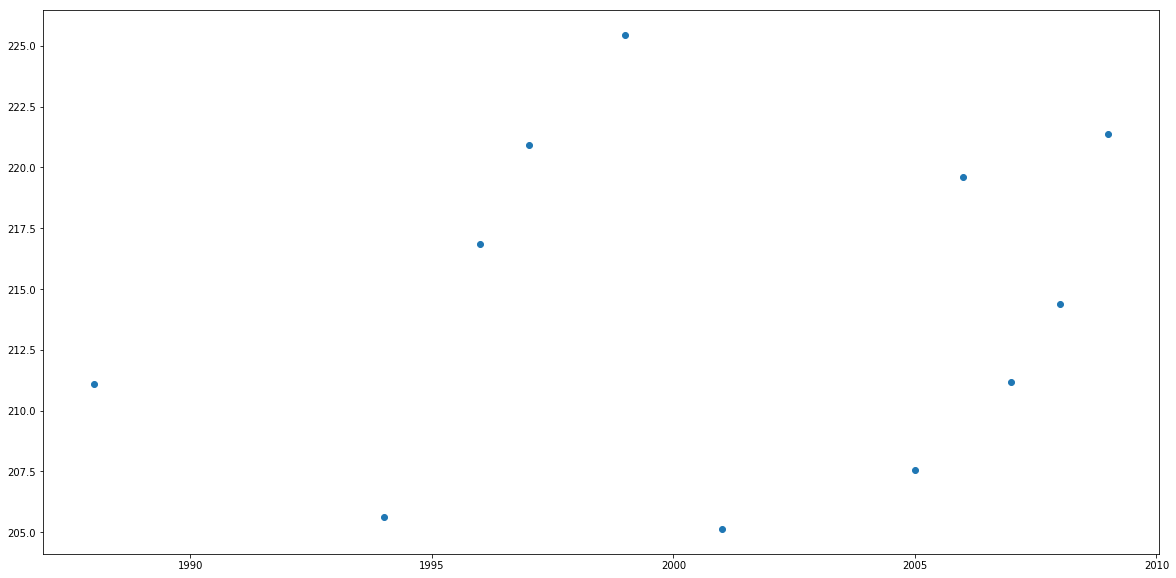

In [34]:
#plotting data points
cols =['year']
y = df['AQI']
x=df[cols]

plt.scatter(x,y)
plt.show()

In [35]:
x = (x - x.mean()) / x.std()
x = np.c_[np.ones(x.shape[0]), x]
x

array([[ 1.        ,  1.20224174],
       [ 1.        ,  1.05365007],
       [ 1.        ,  0.90505839],
       [ 1.        ,  0.75646671],
       [ 1.        ,  0.60787504],
       [ 1.        ,  0.01350833],
       [ 1.        , -0.28367502],
       [ 1.        , -0.58085837],
       [ 1.        , -0.72945005],
       [ 1.        , -1.0266334 ],
       [ 1.        , -1.91818345]])

In [36]:
#Tunning model with GRADIENT DESCENT

alpha = 0.1 #Step size
iterations = 3000 #No. of iterations
m = y.size #No. of data points
np.random.seed(4) #Setting the seed
theta = np.random.rand(2) #Picking some random values to start with

def gradient_descent(x, y, theta, iterations, alpha):
    past_costs = []
    past_thetas = [theta]
    for i in range(iterations):
        prediction = np.dot(x, theta)
        error = prediction - y
        cost = 1/(2*m) * np.dot(error.T, error)
        past_costs.append(cost)
        theta = theta - (alpha * (1/m) * np.dot(x.T, error))
        past_thetas.append(theta)
        
    return past_thetas, past_costs

past_thetas, past_costs = gradient_descent(x, y, theta, iterations, alpha)
theta = past_thetas[-1]

#Print the results...
print("Gradient Descent: {:.2f}, {:.2f}".format(theta[0], theta[1]))

Gradient Descent: 214.47, 1.18


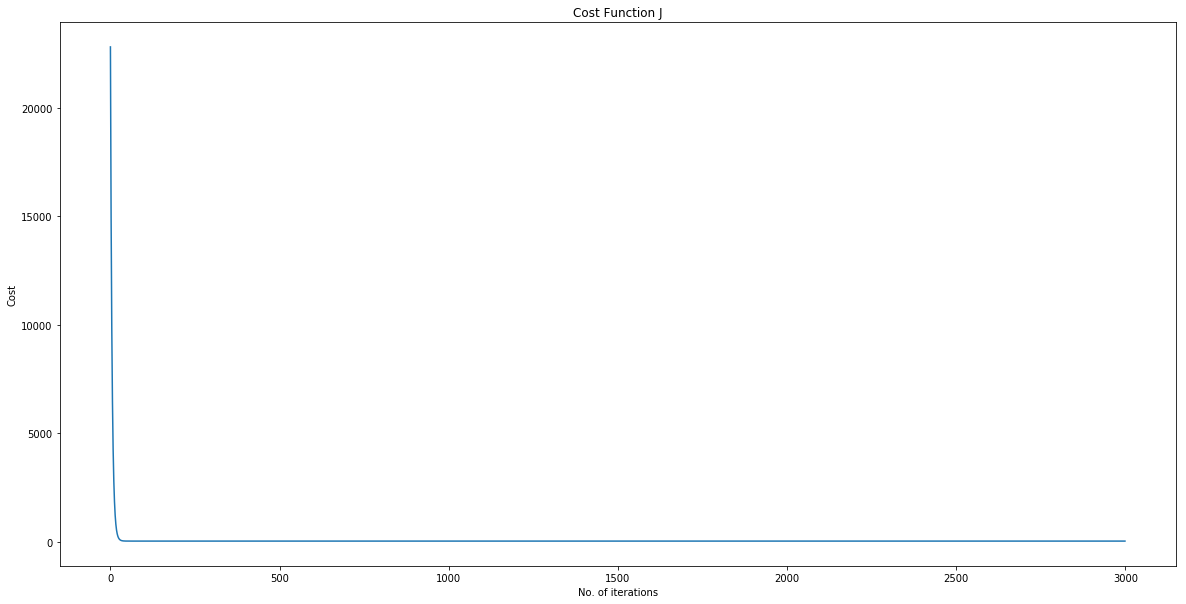

In [37]:
#Plotting the cost function...
plt.title('Cost Function J')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.plot(past_costs)
plt.show()

In [38]:
#predicting january(1988-2009) AQI across india

import numpy as np
newB=[ 214.47, 1.18]

def rmse(y,y_pred):
    rmse= (np.sqrt(np.mean((y-y_pred)**2)))
    return rmse
   
y_pred=x.dot(newB)
dt = pd.DataFrame({'Actual': y, 'Predicted': y_pred})  
x=pd.concat([df, dt], axis=1)
x

,year,AQI,Actual,Predicted
22,2009,221.368166,221.368166,215.888645
21,2008,214.378174,214.378174,215.713307
20,2007,211.160807,211.160807,215.537969
19,2006,219.623267,219.623267,215.362631
18,2005,207.546049,207.546049,215.187293
14,2001,205.138247,205.138247,214.485940
12,1999,225.439218,225.439218,214.135263
10,1997,220.903571,220.903571,213.784587
9,1996,216.850189,216.850189,213.609249
7,1994,205.636343,205.636343,213.258573


In [39]:
#testing the accuracy of the model

from sklearn import metrics
print(np.sqrt(metrics.mean_squared_error(y,y_pred)))

6.489338584209818


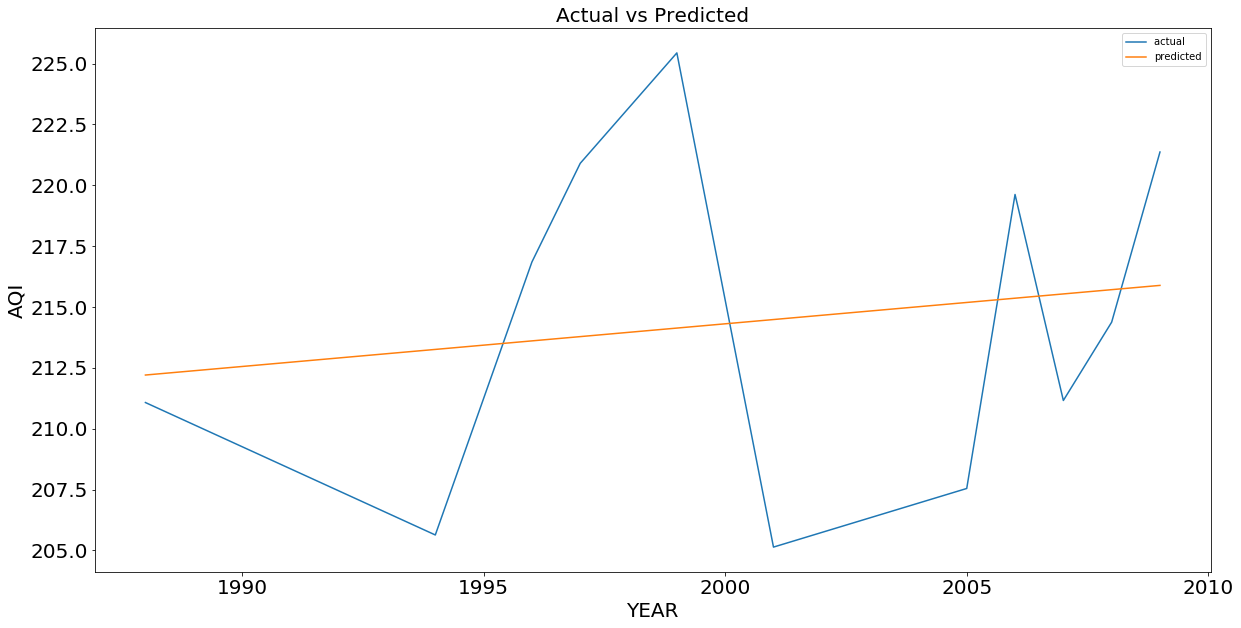

In [40]:
x_axis=x.year
y_axis=x.Actual
y1_axis=x.Predicted
plt.plot(x_axis,y_axis)
plt.plot(x_axis,y1_axis)
plt.title("Actual vs Predicted",fontsize=20)
plt.legend(["actual ","predicted"])
plt.xlabel("YEAR",fontsize=20)
plt.ylabel("AQI",fontsize=20)
plt.tick_params(labelsize=20)
plt.show()

In [41]:
#improving the accuracy by splitting the data on heavy variations

df= dd[['year','AQI']]

#huge variations aqi accures on year 2009-2010 (by moving average graph)
df=df[df.year>2010]
df.describe()

,year,AQI
count,5.000000,5.000000
mean,2013.000000,105.658889
std,1.581139,7.285694
min,2011.000000,99.696254
25%,2012.000000,101.258882
50%,2013.000000,102.785280
75%,2014.000000,106.729246
max,2015.000000,117.824783


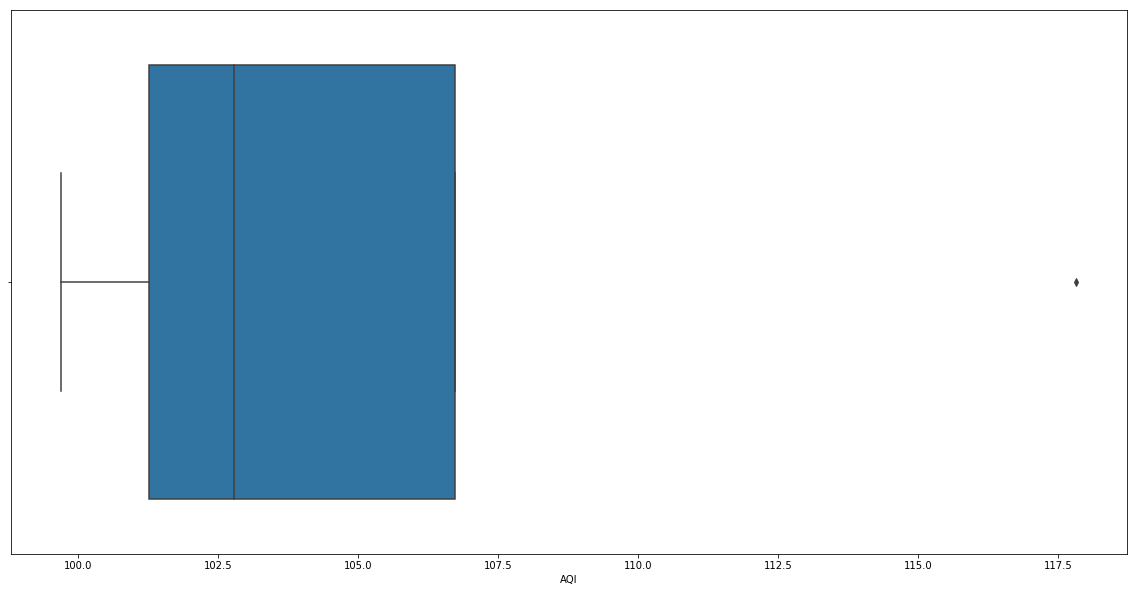

In [42]:
#applying boxplot
import seaborn as sns
sns.boxplot(x=df['AQI'])



In [43]:
df = df[np.isfinite(df['AQI'])]
df=df[df.AQI >101]
df=df[df.AQI <107]
df.head()

,year,AQI
28,2015,101.258882
27,2014,102.785280
26,2013,106.729246


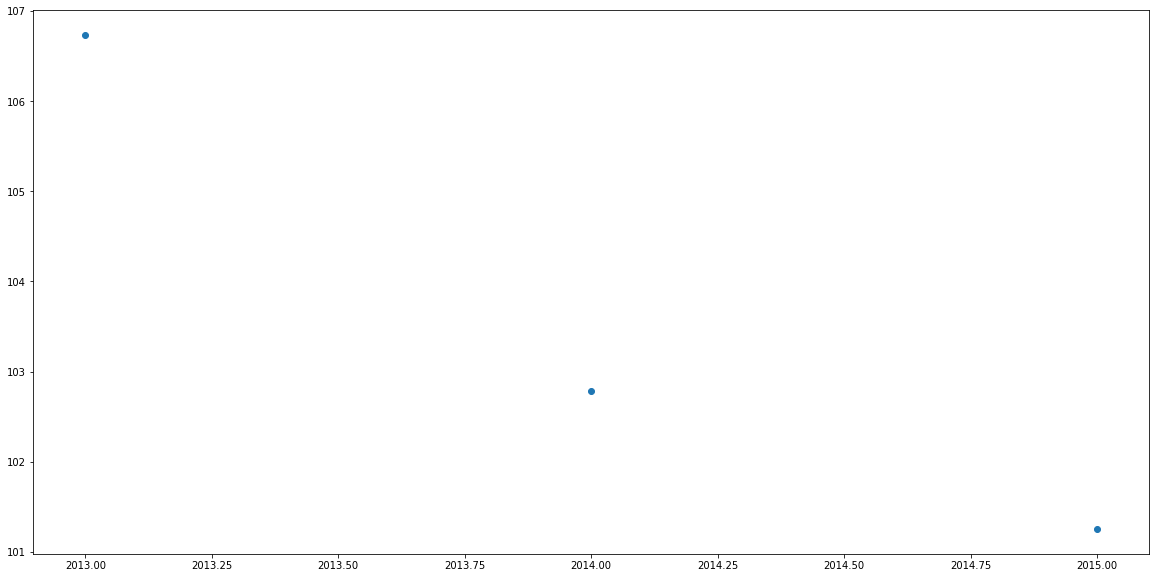

In [44]:
cols =['year']
y = df['AQI']
x=df[cols]

plt.scatter(x,y)
plt.show()

In [45]:
x = (x - x.mean()) / x.std()
x = np.c_[np.ones(x.shape[0]), x]
x

array([[ 1.,  1.],
       [ 1.,  0.],
       [ 1., -1.]])

In [46]:
#Tunning model with GRADIENT DESCENT

alpha = 0.1 #Step size
iterations = 3000 #No. of iterations
m = y.size #No. of data points
np.random.seed(4) #Setting the seed
theta = np.random.rand(2) #Picking some random values to start with

def gradient_descent(x, y, theta, iterations, alpha):
    past_costs = []
    past_thetas = [theta]
    for i in range(iterations):
        prediction = np.dot(x, theta)
        error = prediction - y
        cost = 1/(2*m) * np.dot(error.T, error)
        past_costs.append(cost)
        theta = theta - (alpha * (1/m) * np.dot(x.T, error))
        past_thetas.append(theta)
        
    return past_thetas, past_costs

past_thetas, past_costs = gradient_descent(x, y, theta, iterations, alpha)
theta = past_thetas[-1]

#Print the results...
print("Gradient Descent: {:.2f}, {:.2f}".format(theta[0], theta[1]))

Gradient Descent: 103.59, -2.74


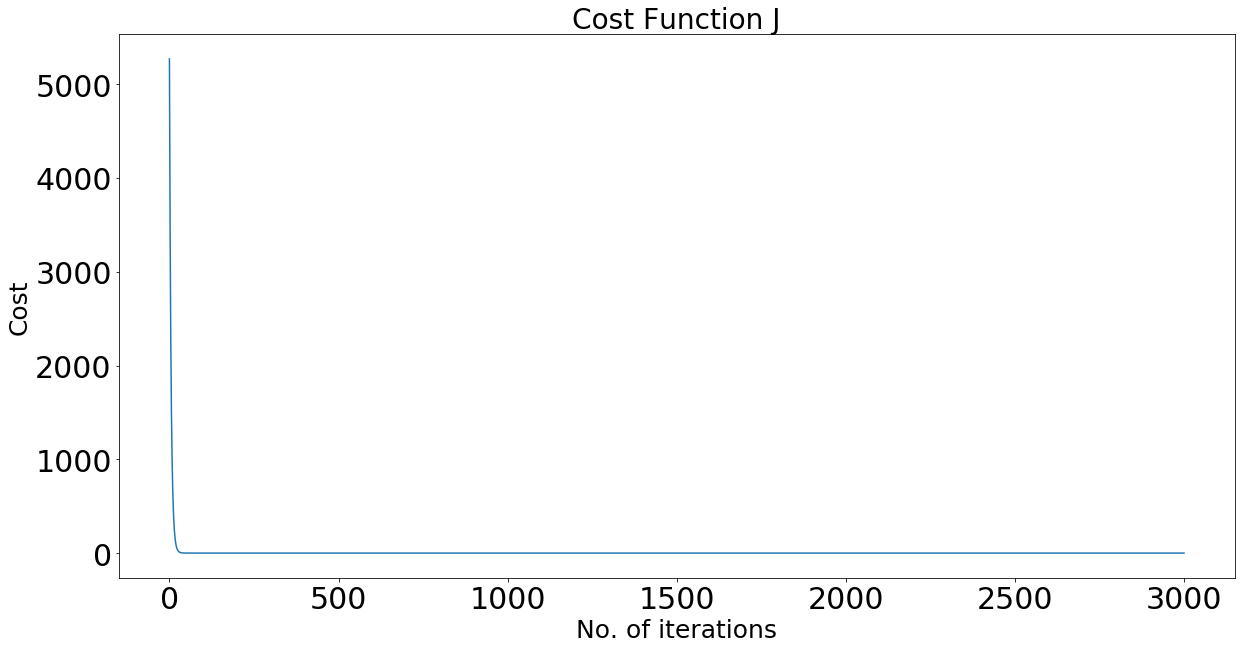

In [47]:
#Plotting the cost function...
plt.title('Cost Function J',fontsize=28)
plt.xlabel('No. of iterations',fontsize=25)
plt.ylabel('Cost',fontsize=25)
plt.plot(past_costs)
plt.tick_params(labelsize=30)
plt.show()

In [48]:
#prediction of january(2013-2015) across india
import numpy as np
newB=[ 103.59, -2.74]

def rmse(y,y_pred):
    rmse= np.sqrt(sum(y-y_pred))
    return rmse
   
y_pred=x.dot(newB)

dt = pd.DataFrame({'Actual': y, 'Predicted': y_pred})  
x=pd.concat([df, dt], axis=1)
x

,year,AQI,Actual,Predicted
28,2015,101.258882,101.258882,100.85
27,2014,102.785280,102.785280,103.59
26,2013,106.729246,106.729246,106.33


In [49]:
#testing the accuracy of the model

from sklearn import metrics
print(np.sqrt(metrics.mean_squared_error(y,y_pred)))

0.5698410166963634


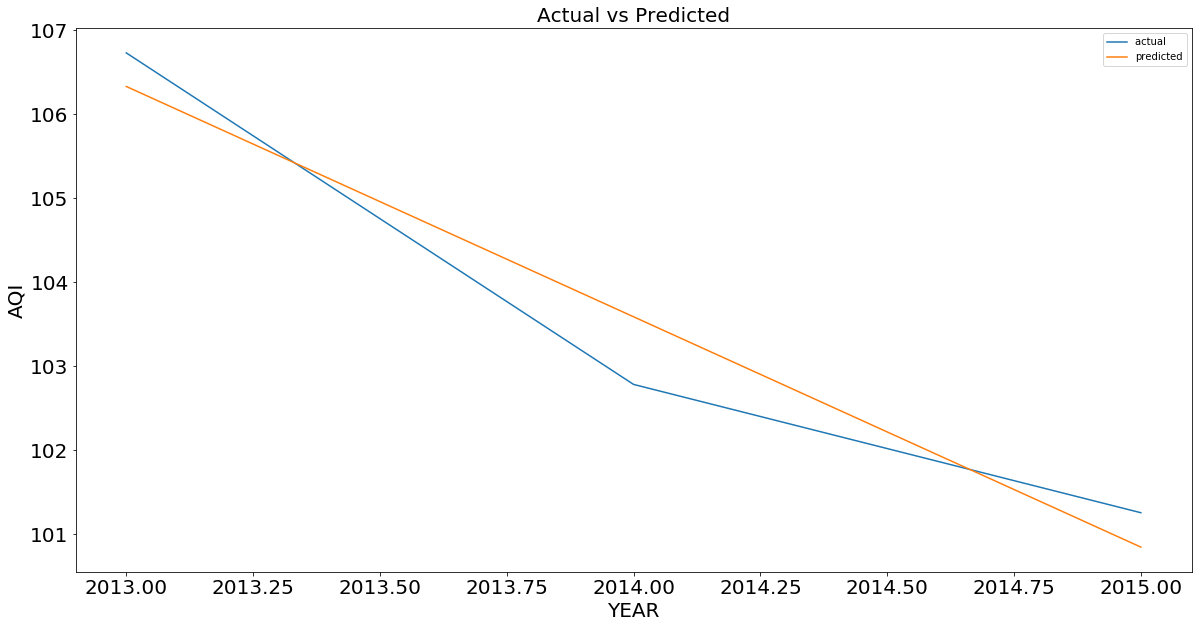

In [50]:
#plotting the actual and predicted results
x_axis=x.year
y_axis=x.Actual
y1_axis=x.Predicted
plt.plot(x_axis,y_axis)
plt.plot(x_axis,y1_axis)
plt.title("Actual vs Predicted",fontsize=20)
plt.legend(["actual ","predicted"])
plt.xlabel("YEAR",fontsize=20)
plt.ylabel("AQI",fontsize=20)
plt.tick_params(labelsize=20)
plt.show()

In [51]:
#Prediction for the future 
from sklearn.preprocessing import MinMaxScaler

In [57]:
#feeding in the x value-years
data=[[-1,2016],[-1,2017],[-1,2018],[-1,2019],[-1,2020],[-1,2021],[-1,2022],[-1,2023]]

In [58]:
#normalization
scaler=MinMaxScaler(feature_range=(-1,1))
scaler.fit(data)
x=scaler.transform(data)

In [59]:
#calculations
newB=[103.59,-2.74]
ypred=-(x.dot(newB))


In [62]:
#AQI for the year 2020
print("AQI for the year 2020===>",ypred[-3])

AQI for the year 2020===> 104.76428571428576


In [65]:
import pickle as p
filename = "AQI_Pred.sav"
p.dump(x,open(filename, "wb"))